In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

In [2]:
'''
Downloading Data
View and download these files from https://github.com/DataScienceInPractice/Data/blob/main/A5/COGS108_IntroQuestionnaireData.csv.
'''

'\nDownloading Data\nView and download these files from https://github.com/DataScienceInPractice/Data/blob/main/A5/COGS108_IntroQuestionnaireData.csv.\n'

In [3]:
'''
Setup
Data: the responses collected from a previous survery of the COGS 108 class.

There are 416 observations in the data, covering 10 different ‘features’.

Research Question: Do students in different majors have different heights?

Background: Physical height has previously shown to correlate with career choice, and career success. 
More recently it has been demonstrated that these correlations can actually be explained by height in high school, 
as opposed to height in adulthood (1). It is currently unclear whether height correlates with choice of major in university.

Reference: 1) https://www.sas.upenn.edu/~apostlew/paper/pdf/short.pdf

Hypothesis: We hypothesize that there will be a relation between height and chosen major.

Part 1: Load & Clean the Data (2.95 points)
Fixing messy data makes up a large amount of the work of being a Data Scientist.

The real world produces messy measurements and it is your job to find ways to standardize your data such 
that you can make useful analyses out of it.

In this section, you will learn, and practice, how to successfully deal with unclean data.

1a) Load the data
Import datafile COGS108_IntroQuestionnaireData.csv into a DataFrame called df.
'''

'\nSetup\nData: the responses collected from a previous survery of the COGS 108 class.\n\nThere are 416 observations in the data, covering 10 different ‘features’.\n\nResearch Question: Do students in different majors have different heights?\n\nBackground: Physical height has previously shown to correlate with career choice, and career success. \nMore recently it has been demonstrated that these correlations can actually be explained by height in high school, \nas opposed to height in adulthood (1). It is currently unclear whether height correlates with choice of major in university.\n\nReference: 1) https://www.sas.upenn.edu/~apostlew/paper/pdf/short.pdf\n\nHypothesis: We hypothesize that there will be a relation between height and chosen major.\n\nPart 1: Load & Clean the Data (2.95 points)\nFixing messy data makes up a large amount of the work of being a Data Scientist.\n\nThe real world produces messy measurements and it is your job to find ways to standardize your data such \nthat

In [4]:
df = pd.read_csv('COGS108_IntroQuestionnaireData.csv')

In [5]:
assert isinstance(df, pd.DataFrame)

In [6]:
# Check out the data
df.head(5)

,Timestamp,What year (in school) are you?,What is your major?,How old are you?,What is your gender?,What is your height?,What is your weight?,What is your eye color?,Were you born in California?,What is your favorite flavor of ice cream?
0,1/9/18 14:49,4,Cognitive Science,21.0,Male,"5'8""",147,Brown,Yes,Vanilla
1,1/9/18 14:49,3,Cognitive Science,20.0,Male,5'8,150,Brown,Yes,Cookies and Cream
2,1/9/18 14:49,Third,Computer Science,21.0,Male,181cm,74kg,Black,Yes,Matcha
3,1/9/18 14:49,2,Cogs HCI,20.0,Male,5’8,133,Brown,Yes,Cookies and Cream
4,1/9/18 14:49,3,Computer Science,20.0,Male,"5'10""",160,Brown,Yes,Cookies n' Cream


In [7]:
# Those column names are a bit excessive, so first let’s rename them - code provided below to do so.
df.columns = ['timestamp', 'year', 'major', 'age', 'gender', 'height',
              'weight', 'eye_color', 'born_in_CA', 'favorite_icecream']

In [8]:
'''
pandas has a very useful function for detecting missing data. This function is called isnull().

If you have a dataframe called df, then calling df.isnull() will return another dataframe of the same size 
as df where every cell is either True of False.

Each True or False is the answer to the question ‘is the data in this cell null?’. 
So, False, means the cell is not null (and therefore, does have data). True means the cell is null (does not have data).

This function is very useful because it allows us to find missing data very quickly in our dataframe. 
As an example, consider the code below.
'''

'\npandas has a very useful function for detecting missing data. This function is called isnull().\n\nIf you have a dataframe called df, then calling df.isnull() will return another dataframe of the same size \nas df where every cell is either True of False.\n\nEach True or False is the answer to the question ‘is the data in this cell null?’. \nSo, False, means the cell is not null (and therefore, does have data). True means the cell is null (does not have data).\n\nThis function is very useful because it allows us to find missing data very quickly in our dataframe. \nAs an example, consider the code below.\n'

In [9]:
# Check the first few rows of the 'isnull' dataframe
df.isnull().head(5)

,timestamp,year,major,age,gender,height,weight,eye_color,born_in_CA,favorite_icecream
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [10]:
# If you print out more, and scroll down, you’ll see some rows with missing data.
# For example:
df.isnull().iloc[48:50, :]

,timestamp,year,major,age,gender,height,weight,eye_color,born_in_CA,favorite_icecream
48,False,False,False,False,False,False,False,False,False,False
49,False,True,False,False,False,True,True,False,False,False


In [11]:
# Check an example, row 49, in which an entry has missing data:
df.iloc[49, :]

timestamp            1/9/18 14:50
year                          NaN
major                     Cog Sci
age                          21.0
gender                     Female
height                        NaN
weight                        NaN
eye_color                   Brown
born_in_CA                    Yes
favorite_icecream       Chocolate
Name: 49, dtype: object

In [12]:
'''
Granted, the example above is not very informative. As you can see, the output of isnull() is a dataframe 
where the values at each cell is either True or False. Most cells have the value of False. 
We expect this to be the case since most people gave out answers to each question in our survey.

However, some rows such as row 49 show that some people chose not to answer certain questions. 
In the case of row 49, it seems that someone did not give out an answer for ‘What year (in school) are you?’

However, what if we wanted to use isnull() to see all rows where our dataframe df has missing values? 
In other words, what if we want to see the ACTUAL rows with missing values instead of this dataframe with True or False cells. 
For that, we need to write the following line of code:

'''

'\nGranted, the example above is not very informative. As you can see, the output of isnull() is a dataframe \nwhere the values at each cell is either True or False. Most cells have the value of False. \nWe expect this to be the case since most people gave out answers to each question in our survey.\n\nHowever, some rows such as row 49 show that some people chose not to answer certain questions. \nIn the case of row 49, it seems that someone did not give out an answer for ‘What year (in school) are you?’\n\nHowever, what if we wanted to use isnull() to see all rows where our dataframe df has missing values? \nIn other words, what if we want to see the ACTUAL rows with missing values instead of this dataframe with True or False cells. \nFor that, we need to write the following line of code:\n\n'

In [13]:
'''
1b) Find missing data
Find all rows that have missing data in them.

Save the ouput, as a dataframe, into a variable called rows_to_drop.

In other words, copy over and use the line of code that we gave out in the cell above.
'''

'\n1b) Find missing data\nFind all rows that have missing data in them.\n\nSave the ouput, as a dataframe, into a variable called rows_to_drop.\n\nIn other words, copy over and use the line of code that we gave out in the cell above.\n'

In [14]:
rows_to_drop = df[df.isnull().any(axis=1)]

In [15]:
# check output
rows_to_drop.shape

(29, 10)

In [16]:
assert isinstance(rows_to_drop, pd.DataFrame)
assert rows_to_drop.shape == (29, 10)

In [17]:
'''
In the cell below, briefly explain below how df[df.isnull().any(axis=1)] works, in a couple sentences.

Include an explanation of what any(axis=1) means and how it affects the code.

***YOUR ANSWER HERE***
Let's break df[df.isnull().any(axis=1)] down:
    df.isnull(): iterates through the dataframe checking if the content of each cell is null.
    any(axis=1): axis=1 indicates any() to iterate through the rows.
                 Any() returns True if the content of at least one of the cells in the row is True.
So df[df.isnull().any(axis=1)] will store in a new df the rows where any of the cells are empty.
***

Run the following cell and look at its output, but you don’t need to add any code here.

Real world data are messy. As an example of it, we consider the data shown in rows_to_drop (below).

If you’ve done everything correctly so far, you should see an unexpected response with emojis at index 357. 
These types of responses, although funny, are hard to parse when dealing with big datasets.

We’ll learn about solutions to these types of problems in the upcoming cells.
'''

"\nIn the cell below, briefly explain below how df[df.isnull().any(axis=1)] works, in a couple sentences.\n\nInclude an explanation of what any(axis=1) means and how it affects the code.\n\n***YOUR ANSWER HERE***\nLet's break df[df.isnull().any(axis=1)] down:\n    df.isnull(): iterates through the dataframe checking if the content of each cell is null.\n    any(axis=1): axis=1 indicates any() to iterate through the rows.\n                 Any() returns True if the content of at least one of the cells in the row is True.\nSo df[df.isnull().any(axis=1)] will store in a new df the rows where any of the cells are empty.\n***\n\nRun the following cell and look at its output, but you don’t need to add any code here.\n\nReal world data are messy. As an example of it, we consider the data shown in rows_to_drop (below).\n\nIf you’ve done everything correctly so far, you should see an unexpected response with emojis at index 357. \nThese types of responses, although funny, are hard to parse when

In [18]:
rows_to_drop

,timestamp,year,major,age,gender,height,weight,eye_color,born_in_CA,favorite_icecream
29,1/9/18 14:50,senior,math&econ,20.0,female,170,130,black,No,NaN
38,1/9/18 14:50,3rd,Computer Engineering,21.0,Female,NaN,NaN,Brown,No,NaN
49,1/9/18 14:50,NaN,Cog Sci,21.0,Female,NaN,NaN,Brown,Yes,Chocolate
58,1/9/18 14:50,3rd,Computer Science,20.0,Female,5ft 2in,NaN,brown,No,cookies and cream
66,1/9/18 14:50,Sophomore,Cognitive Science - Design and Interaction,19.0,Female,5'5,NaN,Brown,No,Chubby hubby ben and jerrys
67,1/9/18 14:50,2,Computer Science,19.0,Male,NaN,170,Brown,Yes,Chocolate
83,1/9/18 14:50,Senior,Computer Science,22.0,Male,5'11,155 lb,dark brown,No,NaN
91,1/9/18 14:50,Third,Computer Science,21.0,Female,NaN,NaN,Black,No,Green tea
92,1/9/18 14:50,4,Computer Science,21.0,Female,"5'5""",NaN,Brown,Yes,Mint chip
133,1/9/18 14:50,2018,computer science,22.0,male,NaN,NaN,brown,No,NaN


In [19]:
'''
1c) Drop the rows with NaN values
Drop any rows with missing data, but only for the columns major, height, gender and age. 
These will be the data of primary interest for our analyses, so we drop missing data here.

Note that there are other missing data (in other rows) but this is fine for our analyses, so we keep them.

To do this, use the pandas dropna method, inplace, using the subset arguments to specify columns.
'''

'\n1c) Drop the rows with NaN values\nDrop any rows with missing data, but only for the columns major, height, gender and age. \nThese will be the data of primary interest for our analyses, so we drop missing data here.\n\nNote that there are other missing data (in other rows) but this is fine for our analyses, so we keep them.\n\nTo do this, use the pandas dropna method, inplace, using the subset arguments to specify columns.\n'

In [20]:
df.dropna(subset=['major', 'height', 'gender', 'age'], inplace=True)

In [21]:
assert df.shape == (403, 10)

In [22]:
'''
In the rest of Part 1, we will work on writing code, organized into functions that will allow us to transform 
similar respones into the same value. We will call this process: standardizing the data.

The cell below provides an example for the kind of code you will need to write to answer this question. 
This example is separate from our actual data, and is a potential function we might use to standardize messy data - in this case, 
hypothetical data to the question ‘What is your favourite major python version?’.

Note some things used in this example that you need to use to standardize data:

    string methods, such as lower and strip to transform strings

    the replace string method, to replace a set of characters with something else

    if/else statements that check what’s in our string (number, letters, etc)

    type casting, for example using int() to turn a variable into an integer

    using np.nan (which stands for ‘not a number’) to denote missing or unknown data

Note: For the following few cells you should run, read, and understand the code provided, 
but you don’t have to add any code until Q1d.
'''

'\nIn the rest of Part 1, we will work on writing code, organized into functions that will allow us to transform \nsimilar respones into the same value. We will call this process: standardizing the data.\n\nThe cell below provides an example for the kind of code you will need to write to answer this question. \nThis example is separate from our actual data, and is a potential function we might use to standardize messy data - in this case, \nhypothetical data to the question ‘What is your favourite major python version?’.\n\nNote some things used in this example that you need to use to standardize data:\n\n    string methods, such as lower and strip to transform strings\n\n    the replace string method, to replace a set of characters with something else\n\n    if/else statements that check what’s in our string (number, letters, etc)\n\n    type casting, for example using int() to turn a variable into an integer\n\n    using np.nan (which stands for ‘not a number’) to denote missing or u

In [23]:
# just run this cell
df['year'].unique()

array(['4', '3', 'Third', '2', '3rd', '3rd year', '5th', 'Second',
       '4th Year', '5', 'Senior', 'Junior', '2nd', '1', 'senior', 'third',
       'first year', '4th', 'Yolanda', 'Junior ', 'Freshman', 'Sophomore',
       '4th year', '6', 'second year', 'Third Year', '2nd year', 'First',
       '5th (2nd year transfer)', '2018', 'last year', 'UCSD',
       'Fifth Year', '2021', 'Fifth year', '3rd Year', '3rd year ',
       'Second year', 'fourth year', 'First year', 'Sophmore',
       'Second Year', 'Junior year', '2020', 'Fifth ', 'Sophomore ',
       '2nd year ', '4th year ', '2nd Year', '4+', 'second', 'Fourth',
       'Senior Year', '2nd (Sophomore)', 'Sixth', 'Senior ', ' 3rd Year',
       'Fourth Year', 'Junior standing', 'Fourth year', 'Fifth',
       'Third year', 'Sineor '], dtype=object)

In [24]:
'''
The line of code above shows us the different values we got, to the question ‘What year (in school) are you?’.

As you can tell, it is a mess!. For example, if you are a junior student, then you might have answered: 
3, three, third, 3rd year, junior, junior year, Junior, etc.

That is an issue. We want to be able to analyze this data and, in order to do this successfully, 
we need all answers with the same meaning to be written in the same way. 
Therefore, we’re gonna have to transform answers such as ‘3, third, 3rd, junior, etc’ into a single possible value. 
We’ll do this for all values that mean the same.
'''

'\nThe line of code above shows us the different values we got, to the question ‘What year (in school) are you?’.\n\nAs you can tell, it is a mess!. For example, if you are a junior student, then you might have answered: \n3, three, third, 3rd year, junior, junior year, Junior, etc.\n\nThat is an issue. We want to be able to analyze this data and, in order to do this successfully, \nwe need all answers with the same meaning to be written in the same way. \nTherefore, we’re gonna have to transform answers such as ‘3, third, 3rd, junior, etc’ into a single possible value. \nWe’ll do this for all values that mean the same.\n'

In [25]:
def example_standardize_function(str_in):
    '''Standardize data to the question 'what is your favorite major python version?'
    
    Parameters
    ----------
    str_in : string
        A provided answer.
        
    Returns
    -------
    int_out : int or np.nan
        A standardized integer response.
    '''
    
    # Make the input all lowercase
    str_in = str_in.lower()
    
    # Drop all whitespace
    str_in = str_in.strip()
    
    # Replace things (and then strip again afterwords)
    #  Note that the 'replace' replaces the first argument, with the second
    #   The first argument does not need to be present in the string,
    #    if it's not there 'replace' does nothing (but does not error), so the code moves on.
    str_in = str_in.replace('version', '')
    str_in = str_in.replace('python', '')
    str_in = str_in.strip()
    
    # Cast to integer, if what's left seems appropriate
    if str_in.isnumeric() and len(str_in) == 1:
        out = int(str_in)
    # Otherwise, consider input was probably ill-formed, return nan
    else: 
        out = np.nan
    
    return out

# Check how this function help standardize data:
#  Example possible answers to the question 'What is your favourite major version of Python':
print('INPUT', '\t\t-\t', 'OUTPUT')
for inp in ['version 3', '42', '2', 'python 3', 'nonsense-lolz']:
    print('{:10s} \t-\t {:1.0f}'.format(inp, example_standardize_function(inp)))

INPUT 		-	 OUTPUT
version 3  	-	 3
42         	-	 nan
2          	-	 2
python 3   	-	 3
nonsense-lolz 	-	 nan


In [26]:
'''
Now we have to standardize the data!

Check all different values given for majors. It’s a lot!
'''
df['major'].unique()

array(['Cognitive Science', 'Computer Science', 'Cogs HCI',
       'Cognitive Science w/ a specialization in Computation',
       'International Studies', 'Computer Engineering',
       'computer science', 'Chemical Engineering / Literature Writing',
       'Cognitive Science w/ Specialization in Human Computer Interaction',
       'Cognitive Science-- Machine Learning and Neural Computation ',
       'Cse', 'Cognitive Science - Design and Interaction',
       'cognitive science', 'CSE', 'Cog sci design interaction',
       'Math CS', 'Electrical Engineering', 'math&econ',
       'Cognitive Science spec/ HCI', 'Cognitive science', 'Math-CS',
       'Data Science', 'Cognitive science ', 'Cognitive Science ',
       'Math - CS ', 'Cognitive Science Human Computer Interaction',
       'Cognitive Science with specialization in HCI ',
       'Cognitive Science (HCI)', 'Probability & Statistics', 'Cog Sci',
       'Cognitive Science - Machine Learning',
       'Mathematics-computer science',

In [27]:
# We’ll write a function performing some simple substring checking in order to group many responses together.
def standardize_major(string):
    
    string = string.lower()
    string = string.strip()
    
    if 'cog' in string:
        output = 'COGSCI'
    elif 'computer' in string:
        output = 'COMPSCI'
    elif 'cs' in string:
        output = 'COMPSCI'
    elif 'math' in string:
        output = 'MATH'
    elif 'electrical' in string:
        output = 'ECE'
    elif 'bio' in string:
        output = 'BIO'
    elif 'chem' in string:
        output = 'CHEM'
    # Otherwise, if uncaught - keep as is
    else:
        output = string
    
    return output

In [28]:
# We then have to apply the transformation using the function we just defined.
df['major'] = df['major'].apply(standardize_major)

In [29]:
'''
Previewing the results of the previous transformation.

It looks a lot better, though it’s not perfect, but we’ll run with this.
'''
df['major'].unique()

array(['COGSCI', 'COMPSCI', 'international studies', 'CHEM', 'ECE',
       'MATH', 'data science', 'political science', 'BIO', 'psychology',
       'physiology and neuroscience', 'management science',
       'interdisciplinary computing & the arts', 'machine learning',
       'neuroscience'], dtype=object)

In [30]:
'''
1d) Standardize ‘gender’ function
Next let’s check the ‘gender’ column.

Check the different responses received for gender, including how many of each response we have
'''
# run this to see different gender input data
df['gender'].value_counts()

Male           229
Female          95
female          26
male            18
F               10
M                6
Female           6
Male             6
Famale           1
men              1
MALE             1
Rainbow          1
Woman            1
Transgender      1
Nonbinary        1
Name: gender, dtype: int64

In [31]:
'''
Using a similar approach to what we used for ‘major’, you’ll write a standardize_gender function.

To do this you’ll:

    convert all text to lowercase

    use the string method strip() to remove leading and trailing characters from the gender value

    use an if/elif/else to:

        output ‘female’ if the lowercale gender value is ‘female’, ‘f’, ‘woman’, ‘famale’, or ‘women’

        output ‘male’ if the lowercase gender value is ‘male’, ‘m’, ‘man’, or ‘men’

        output ‘nonbinary_or_trans’ if the lowercase gender value is ‘nonbinary’ or ‘transgender’

        output np.nan otherwise

    return the output
'''

'\nUsing a similar approach to what we used for ‘major’, you’ll write a standardize_gender function.\n\nTo do this you’ll:\n\n    convert all text to lowercase\n\n    use the string method strip() to remove leading and trailing characters from the gender value\n\n    use an if/elif/else to:\n\n        output ‘female’ if the lowercale gender value is ‘female’, ‘f’, ‘woman’, ‘famale’, or ‘women’\n\n        output ‘male’ if the lowercase gender value is ‘male’, ‘m’, ‘man’, or ‘men’\n\n        output ‘nonbinary_or_trans’ if the lowercase gender value is ‘nonbinary’ or ‘transgender’\n\n        output np.nan otherwise\n\n    return the output\n'

In [32]:
def standardize_gender(string):
    string = string.lower()
    string = string.strip()
    female = ['female', 'f', 'woman', 'famale', 'women']
    male = ['male', 'm', 'man', 'men']
    non_or_trans = ['nonbinary', 'transgender']
    if any(x in string for x in female):
        output = 'female'
    elif any(x in string for x in male):
        output = 'male'
    elif any(x in string for x in non_or_trans):
        output = 'nonbinary_or_trans'
    else:
        output = np.nan
    return output

In [33]:
assert standardize_gender('f') == 'female'
assert standardize_gender('male') == 'male'
assert standardize_gender('Transgender') == 'nonbinary_or_trans'

In [34]:
'''
1e) Transform ‘gender’ column
Apply the transformation, meaning, use your function and standardize gender in df

Then, drop any rows with missing gender information.
'''

'\n1e) Transform ‘gender’ column\nApply the transformation, meaning, use your function and standardize gender in df\n\nThen, drop any rows with missing gender information.\n'

In [35]:
df['gender'] = df['gender'].apply(standardize_gender)
df.dropna(subset='gender', inplace=True)

In [36]:
# Check the results
df['gender'].unique()

array(['male', 'female', 'nonbinary_or_trans'], dtype=object)

In [37]:
assert len(df['gender'].unique()) == 3
assert df.shape == (402, 10)

In [38]:
'''
1f) Standardize other columns
Find, programatically, the number of unique responses in the ‘year’ column.

Save the result in a variable named num_unique_responses.

Hint: you can answer this question using the unique method, used above.
'''

'\n1f) Standardize other columns\nFind, programatically, the number of unique responses in the ‘year’ column.\n\nSave the result in a variable named num_unique_responses.\n\nHint: you can answer this question using the unique method, used above.\n'

In [39]:
num_unique_responses = df['year'].unique()
num_unique_responses

array(['4', '3', 'Third', '2', '3rd', '3rd year', '5th', 'Second',
       '4th Year', '5', 'Senior', 'Junior', '2nd', '1', 'senior', 'third',
       'first year', '4th', 'Yolanda', 'Junior ', 'Freshman', 'Sophomore',
       '4th year', '6', 'second year', 'Third Year', '2nd year', 'First',
       '5th (2nd year transfer)', '2018', 'last year', 'UCSD',
       'Fifth Year', '2021', 'Fifth year', '3rd Year', '3rd year ',
       'Second year', 'fourth year', 'First year', 'Sophmore',
       'Second Year', 'Junior year', '2020', 'Fifth ', 'Sophomore ',
       '2nd year ', '4th year ', '2nd Year', '4+', 'second', 'Fourth',
       'Senior Year', '2nd (Sophomore)', 'Sixth', 'Senior ', ' 3rd Year',
       'Fourth Year', 'Junior standing', 'Fourth year', 'Fifth',
       'Third year', 'Sineor '], dtype=object)

In [40]:
assert num_unique_responses
assert isinstance(num_unique_responses, int)

<class 'ValueError'>: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [41]:
'''
1g) Standardize ‘year’ column
Write a function named standardize_year that takes in as input a string and returns an integer.

The function will do the following (in the order specified):

Note that for these detailed instructions, each line corresponds to one line of code you need to write.

    convert all characters of the string into lowercase

    strip the string of all leading and trailing whitespace

    replace any occurences of ‘first’ with ‘1’

    replace any occurences of ‘second’ with ‘2’

    replace any occurences of ‘third’ with ‘3’

    replace any occurences of ‘fourth’ with ‘4’

    replace any occurences of ‘fifth’ with ‘5’

    replace any occurences of ‘sixth’ with ‘6’

    replace any occurences of ‘freshman’ with ‘1’

    replace any occurences of ‘sophomore’ with ‘2’

    replace any occurences of ‘junior’ with ‘3’

    replace any occurences of ‘senior’ with 4’

    replace any occurences of ‘year’ with ‘’ (remove it from the string)

    replace any occurences of ‘th’ with ‘’ (remove it from the string)

    replace any occurences of ‘rd’ with ‘’ (remove it from the string)

    replace any occurences of ‘nd’ with ‘’ (remove it from the string)

    strip the string of all leading and trailing whitespace (again)

    If the resulting string is a number and it is less than 10, then cast it into an integer and return that value

    Else return np.nan to symbolize that the student’s response was not a valid entry

HINTS: you will need to use the functions lower(), strip(), isnumeric() and replace()
'''

'\n1g) Standardize ‘year’ column\nWrite a function named standardize_year that takes in as input a string and returns an integer.\n\nThe function will do the following (in the order specified):\n\nNote that for these detailed instructions, each line corresponds to one line of code you need to write.\n\n    convert all characters of the string into lowercase\n\n    strip the string of all leading and trailing whitespace\n\n    replace any occurences of ‘first’ with ‘1’\n\n    replace any occurences of ‘second’ with ‘2’\n\n    replace any occurences of ‘third’ with ‘3’\n\n    replace any occurences of ‘fourth’ with ‘4’\n\n    replace any occurences of ‘fifth’ with ‘5’\n\n    replace any occurences of ‘sixth’ with ‘6’\n\n    replace any occurences of ‘freshman’ with ‘1’\n\n    replace any occurences of ‘sophomore’ with ‘2’\n\n    replace any occurences of ‘junior’ with ‘3’\n\n    replace any occurences of ‘senior’ with 4’\n\n    replace any occurences of ‘year’ with ‘’ (remove it from the

In [42]:
def standardize_year(string):
    string = string.lower()
    string = string.strip()
    string = string.replace('first', '1')
    string = string.replace('second', '2')
    string = string.replace('third', '3')
    string = string.replace('fourth', '4')
    string = string.replace('fifth', '5')
    string = string.replace('sixth', '6')
    string = string.replace('freshman', '1')
    string = string.replace('sophomore', '2')
    string = string.replace('junior', '3')
    string = string.replace('senior', '4')
    string = string.replace('year', '')
    string = string.replace('th', '')
    string = string.replace('rd', '')
    string = string.replace('nd', '')
    string = string.strip()
    if string.isnumeric() and int(string) < 10:
        output = int(string)
    else:
        output = np.nan
    return output

In [43]:
assert standardize_year('2nd') == 2
assert standardize_year('sophomore') == 2
assert standardize_year('3rd year') == 3
assert standardize_year('5th') == 5
assert standardize_year('7    ') == 7
assert standardize_year('randomText') is np.nan

In [44]:
'''
1h) Transform ‘year’ column
Use standardize_year to transform the data in column ‘What year (in school) are you?’.

Hint: use the apply function AND remember to save your output inside the dataframe
'''

'\n1h) Transform ‘year’ column\nUse standardize_year to transform the data in column ‘What year (in school) are you?’.\n\nHint: use the apply function AND remember to save your output inside the dataframe\n'

In [45]:
df['year'] = df['year'].apply(standardize_year)

In [46]:
assert len(df['year'].unique()) == 7

In [47]:
'''
Assuming that all is correct up to this point, the line below should show all values now found in df['year'].

It should look a lot better. With this data, we can now make insightful analyses.

You should see an array with elements 1,2,3,4,5,6 and nan (not necessarily in that order).

Note that if you check the data type of this column, you’ll see that pandas converts these numbers to float, 
even though the applied function returns int, because np.nan is considered a float. This is fine.
'''

"\nAssuming that all is correct up to this point, the line below should show all values now found in df['year'].\n\nIt should look a lot better. With this data, we can now make insightful analyses.\n\nYou should see an array with elements 1,2,3,4,5,6 and nan (not necessarily in that order).\n\nNote that if you check the data type of this column, you’ll see that pandas converts these numbers to float, \neven though the applied function returns int, because np.nan is considered a float. This is fine.\n"

In [48]:
df['year'].unique()

array([ 4.,  3.,  2.,  5.,  1., nan,  6.])

In [49]:
# Let’s do it again. Let’s take a look at the responses in the ‘weight’ column, and then standardize them.
# First, ensure that all types are consistent, use strings
df['weight'] = df['weight'].astype(str)

In [50]:
# Check all the different answers we received
df['weight'].unique()

array(['147', '150', '74kg', '133', '160', '106 lb', '155', '170 pounds',
       '170', '135', '115', '110', '167 lbs', '60kg', '136', '140', '120',
       '78kg', '128 lbs', '220', '145lb', '180', '105', '160lbs', '130',
       '177g', '125 pounds', '125', '210', '69kg', '165', '160 lbs',
       '123', '135lbs', '112 pounds', '190', '145lbs', '150 lbs', 'nan',
       '193lbs', '73kg', '133 lb', '107 pounds', '200', '240', '47kg',
       '175', '120 lbs', '164', '110 lbs', '128lbs', '155 lb', '185',
       '167', '84 kg', '113', '235', '128lb', '119 lbs', '110 lb', '72kg',
       '122', '140 lbs', '70 kg', '165 pounds ', '128', '125 lb', '108',
       '15', '215', '48kg', '52kg', '145', '185lbs. ', '230lb', '125 lbs',
       '140 lb', '168lb', '100', '130 pounds', '124', '84kg', '119',
       "I don't know dude but heavy probably", '103', '140lbs', '170lbs',
       '155 lbs', '50kg', '190 lbs', '52 kg', '168lbs', '189', '168',
       '76KG', '77kg', '181', '146', '156', '140 pounds', '

In [51]:
'''
1i) Standardize ‘weight’ column
Write a function named standardize_weight that takes in as input a string and returns an integer.

The function will do the following (in the order specified):

    convert all characters of the string into lowercase

    strip the string of all leading and trailing whitespace

    replace any occurences of ‘lbs’ with ‘’ (remove it from the string)

    replace any occurences of ‘lb’ with ‘’ (remove it from the string)

    replace any occurences of ‘pounds’ with ‘’ (remove it from the string)

    If the string contains the substring ‘kg’, then:

        replace ‘kg’ with ‘’

        strip the string of whitespace

        cast the string into a float type using the function float()

        multiply the resulting float by 2.2 (an approximate conversion of kilograms to pounds)

try to return the int of your string. If it cannot, return np.nan.
'''

'\n1i) Standardize ‘weight’ column\nWrite a function named standardize_weight that takes in as input a string and returns an integer.\n\nThe function will do the following (in the order specified):\n\n    convert all characters of the string into lowercase\n\n    strip the string of all leading and trailing whitespace\n\n    replace any occurences of ‘lbs’ with ‘’ (remove it from the string)\n\n    replace any occurences of ‘lb’ with ‘’ (remove it from the string)\n\n    replace any occurences of ‘pounds’ with ‘’ (remove it from the string)\n\n    If the string contains the substring ‘kg’, then:\n\n        replace ‘kg’ with ‘’\n\n        strip the string of whitespace\n\n        cast the string into a float type using the function float()\n\n        multiply the resulting float by 2.2 (an approximate conversion of kilograms to pounds)\n\ntry to return the int of your string. If it cannot, return np.nan.\n'

In [52]:
def standardize_weight(string):
    string = string.lower().strip()
    string = string.replace('lbs', '').strip()
    string = string.replace('lb', '').strip()
    string = string.replace('pounds', '').strip()
    if 'kg' in string:
        string = str(round(float(string.replace('kg', '').strip()) * 2.2))
    if string.isnumeric():
        output = int(string)
    else:
        output = np.nan
    return output

In [53]:
assert standardize_weight('34 lbs') == 34
assert standardize_weight('101 kg') == 222

In [54]:
'''
1j) Transform ‘weight’ column
Use standardize_weight to transform the data in the ‘weight’ column.

Hint: use the apply function AND remember to save your output inside the dataframe
'''

'\n1j) Transform ‘weight’ column\nUse standardize_weight to transform the data in the ‘weight’ column.\n\nHint: use the apply function AND remember to save your output inside the dataframe\n'

In [55]:
df['weight'] = df['weight'].apply(standardize_weight)

In [56]:
assert df['weight'].unique().shape == (83,)

In [57]:
# Now, let’s see the result of our hard work. The code below should output all numbers (or nan).
df['weight'].unique()

array([147., 150., 163., 133., 160., 106., 155., 170., 135., 115., 110.,
       167., 132., 136., 140., 120., 172., 128., 220., 145., 180., 105.,
       130.,  nan, 125., 210., 152., 165., 123., 112., 190., 193., 161.,
       107., 200., 240., 103., 175., 164., 185., 113., 235., 119., 158.,
       122., 154., 108.,  15., 215., 114., 230., 168., 100., 124., 189.,
       169., 181., 146., 156., 101., 250., 173., 134., 102., 320., 142.,
       280., 209.,  58., 129., 187., 138., 141.,  98., 194., 205., 300.,
        99., 179., 116.,  75.,  85., 139.])

In [58]:
'''
1k) Standardize ‘favorite_icecream’ column
Write a function named standardize_icecream that takes in as input a string and returns a standardized string.

This function should:

ensure all inputs are strings (Note: np.nan is considered a float that will be converted to ‘nan’ if typecast with str())

convert all characters of the string into lowercase

strip the string of all leading and trailing whitespace

standardize the flavors such that:

    if either ‘don’t’ or ‘no favorite’ is in the response, the flavor is recorded as np.nan

    if either ‘cream’ or ‘creme’ is in the response, the flavor is ‘cookies & cream’

    if ‘dough’ is in the response, the flavor is recorded as ‘chocolate chip cookie dough’ 
    (we’ll consider cookie dough and chocolate chip cookie dough to be the same)

    if ‘vanilla’ is in the response, the flavor is recorded as ‘vanilla’

    if ‘mint’ is in the response, the flavor is recorded as ‘mint chocolate chip’ 
    (we’ll consider mint and mint chocolate chip to be the same)

    if ‘oreo’ is in the response, the flavor is recorded as ‘oreo’

    if ‘pistac’ is in the response, the flavor is recorded as ‘pistachio’ (note the different spellings in original)

    if ‘matcha’ is in the response, the flavor is recorded as ‘matcha’

return the standardized ice cream flavor.
'''

'\n1k) Standardize ‘favorite_icecream’ column\nWrite a function named standardize_icecream that takes in as input a string and returns a standardized string.\n\nThis function should:\n\nensure all inputs are strings (Note: np.nan is considered a float that will be converted to ‘nan’ if typecast with str())\n\nconvert all characters of the string into lowercase\n\nstrip the string of all leading and trailing whitespace\n\nstandardize the flavors such that:\n\n    if either ‘don’t’ or ‘no favorite’ is in the response, the flavor is recorded as np.nan\n\n    if either ‘cream’ or ‘creme’ is in the response, the flavor is ‘cookies & cream’\n\n    if ‘dough’ is in the response, the flavor is recorded as ‘chocolate chip cookie dough’ \n    (we’ll consider cookie dough and chocolate chip cookie dough to be the same)\n\n    if ‘vanilla’ is in the response, the flavor is recorded as ‘vanilla’\n\n    if ‘mint’ is in the response, the flavor is recorded as ‘mint chocolate chip’ \n    (we’ll consid

In [59]:
def standardize_icecream(string):
    string = str(string).lower().strip()
    if "don't" in string or 'no favorite' in string:
        output = np.nan
    elif 'cream' in string or 'creme' in string:
        output = 'cookies & cream'
    elif 'dough' in string:
        output = 'chocolate chip cookie dough'
    elif 'vanilla' in string:
        output = 'vanilla'
    elif 'oreo' in string:
        output = 'oreo'
    elif 'matcha' in string:
        output = 'matcha'
    elif 'mint' in string:
        output = 'mint chocolate chip'
    elif 'pistac' in string:
        output = 'pistachio'
    else:
        output = string
    return str(output)

In [60]:
# Check all the different answers we received
df['favorite_icecream'].unique()

array(['Vanilla', 'Cookies and Cream', 'Matcha', "Cookies n' Cream",
       'Chocolate', 'Mint chocolate chip', 'mint', 'Cookie dough',
       'cookies and cream', 'vanilla', 'Sweet cream', 'Cookie & Cream',
       'None', 'Mint Chocolate Chip', 'mint chocolate chip', 'phish food',
       'chocolate chip', nan, 'rose', 'Chocolate Chip Cookie Dough',
       'Moose Tracks', 'butterscotch', 'Pistacchio', 'Mocha',
       'Butter Pecan', 'Strawberry', 'Pistachio', 'Chocolate ', 'coffee',
       'Cookies & Cream', 'Mint Chocolate', 'Cookie Dough ', 'Lemon',
       'Green tea', 'Strawberry ', 'Cookie Dough', 'Half Baked', 'Mango',
       'Chubby hubby ben and jerrys', 'Coffee', 'Pecan praline',
       'cookie dough', 'Green Tea', 'chocolate espresso cookie crumble',
       'Oreo Cookies and Creme', 'tofu', 'Cookies n Cream', 'Phish Food',
       'mint and chip', 'Oreos', 'pistachio',
       "Cookies and Cream (or Ben & Jerry's Half Baked)", 'Mint chip',
       'Cake Batter', 'Chocolate chip c

In [61]:
assert standardize_icecream('vanilla') == 'vanilla'
assert standardize_icecream('Vanilla') == 'vanilla'
assert standardize_icecream(np.nan) == 'nan'

# cases that follow instructions
assert standardize_icecream('this is not actually a flavor but has the word cream') == 'cookies & cream'
assert standardize_icecream('cookies & creme') == 'cookies & cream'
assert standardize_icecream('Vanilla ') == 'vanilla'

In [62]:
'''
1l) Transform ‘favorite_icecream’ column
Use standardize_icecream to transform the data in the ‘favorite_icecream’ column.

Hint: use the apply function AND remember to save your output inside the dataframe
'''

'\n1l) Transform ‘favorite_icecream’ column\nUse standardize_icecream to transform the data in the ‘favorite_icecream’ column.\n\nHint: use the apply function AND remember to save your output inside the dataframe\n'

In [63]:
df['favorite_icecream'] = df['favorite_icecream'].apply(standardize_icecream)

In [66]:
# check output now that we've standardized
df['favorite_icecream'].unique()

array(['vanilla', 'cookies & cream', 'matcha', 'chocolate',
       'mint chocolate chip', 'chocolate chip cookie dough', 'none',
       'phish food', 'chocolate chip', 'nan', 'rose', 'moose tracks',
       'butterscotch', 'pistachio', 'mocha', 'butter pecan', 'strawberry',
       'coffee', 'lemon', 'green tea', 'half baked', 'mango',
       'chubby hubby ben and jerrys', 'pecan praline',
       'chocolate espresso cookie crumble', 'tofu', 'oreo', 'cake batter',
       'earl gray', 'raspberry', 'yogurt or any fruity flavor', 'yams',
       'mcvoytek', "i'm vegan", 'vanila', 'chocolate carmel', 'green',
       'strawberry cheesecake', 'birthday cake', 'green tea mango',
       'caramel fudge', 'peanut butter', 'three musketeers', 'almond',
       'human', 'original', 'rainbow', 'cherry garcia', 'green teaaa',
       'straciatella', 'coconut', 'nutty coconut', 'shorbet', 'banana',
       'sweet taro', 'wasabi', 'milk', 'salted caramel', '💩', 'brownie',
       'dulce de leche',
       'win

In [65]:
assert df['favorite_icecream'].unique().shape == (82,)

In [67]:
'''
So far, you’ve gotten a taste of what it is like to deal with messy data. It’s not easy, as you can tell.

The last variable we need to standardize for the purposes of our analysis is ‘height’. We will standardize that one for you.

Do read the code below and try to understand what it is doing.
'''

'\nSo far, you’ve gotten a taste of what it is like to deal with messy data. It’s not easy, as you can tell.\n\nThe last variable we need to standardize for the purposes of our analysis is ‘height’. We will standardize that one for you.\n\nDo read the code below and try to understand what it is doing.\n'

In [68]:
# First, we'll look at the possible values for height
df['height'].unique()

array(['5\'8"', "5'8", '181cm', '5’8', '5\'10"', '5\'11"', "5'9",
       '5 ft, 3 in', "5'10", '180 cm', '5\'3"', '5\'9"', '5\'2"',
       '5ft 5inches', '158cm', '5\'7"', '5 feet 8 inches', "5'7''",
       "5' 8'' ", '184cm', '5\' 7"', '6’2”', "6'1''", "5'11", '6\'2"',
       "5'4", '170', '177cm', '5\'6"', '5’5', "5'5", "6'2", '171cm',
       "5' 5''", "5'2", '5', "5'7", '5\' 8"', "5'3", '5 feet 7 inches',
       '6’0', '5’3', '64 in', "5' 7''", '5ft 2in', '6\'1"', '66', '173cm',
       '5’8”', '5 feet 2 in', '5 7', '6’', '5.4', '6 feet', '5’0”',
       '1.6m', '5 ft 2 in', '5\'1"', '5’5”', "5' 8''", '6\'4"', '5\'8.5"',
       '178 cm', '5\'5"', "6'1", '5”7’', '174cm', '71', "5' 1", '5\' 6"',
       '5” 4’', '177 cm', '71 inches ', "5'4''", '5\' 4"', '5 foot 11',
       "5''2'", '6 feet 0 inches', '67', '167cm', "5'8''", '168cm', '5"8',
       '5\' 10"', '6ft', '163 cm', '5 Feet 6 inches', '6.1', '5 foot 7',
       '5 ft 3', '5 7"', '5\'4"', '172 cm', '5-Jun', '5’ 6’’', '6’0”',
     

In [69]:
'''
It seems like we’ll have to handle different measurement systems. Ugh, ok…

Let’s write a function that converts all those values to inches.
'''

'\nIt seems like we’ll have to handle different measurement systems. Ugh, ok…\n\nLet’s write a function that converts all those values to inches.\n'

In [70]:
# convert all values to inches
def standardize_height(string):
    
    orig = string
    output = None
    
    # Basic string pre-processing
    string = string.lower()
    string = string.strip()
    
    string = string.replace('foot', 'ft')
    string = string.replace('feet', 'ft')
    string = string.replace('inches', 'in')
    string = string.replace('inch', 'in')
    string = string.replace('meters', 'm')
    string = string.replace('meter', 'm')
    string = string.replace('centimeters', 'cm')
    string = string.replace('centimeter', 'cm')
    string = string.replace(',', '')
    string = string.strip()
    
    # CASE 1: string is written in the format FEET <DIVIDER> INCHES
    dividers = ["'", "ft", "’", '”', '"','`', "-", "''"]
    
    for divider in dividers:
        
        # Split it into its elements
        elements = string.split(divider)

        # If the divider creates two elements
        if (len(elements) >= 2) and ((len(string) -1) != string.find(divider)):
            feet = elements[0]
            inch = elements[1] if elements[1] is not '' else '0'
            
            # Cleaning extranious symbols
            for symbol in dividers:
                feet = feet.replace(symbol, '')
                inch = inch.replace(symbol, '')
                inch = inch.replace('in','')
            
            # Removing whitespace
            feet = feet.strip()
            inch = inch.strip()
            
            # By this point, we expect 'feet' and 'inch' to be numeric
            # If not...we ignore this case
            if feet.replace('.', '').isnumeric() and inch.replace('.', '').isnumeric():
                
                # Converting feet to inches and adding it to the current inches
                output = (float(feet) * 12) + float(inch)
                break
            
    # CASE 2: string is written in the format FEET ft INCHES in 
    if ('ft' in string) and ('in' in string):
        
        # Split it into its elements
        elements = string.split('ft')
        feet = elements[0]
        inch = elements[1]
        
        # Removing extraneous symbols and stripping whitespace
        inch = inch.replace('inch', '')
        inch = inch.replace('in', '')
        feet = feet.strip()
        inch = inch.strip()
        
        # By this point, we expect 'feet' and 'inch' to be numeric
        # If not...we ignore this case
        if feet.replace('.', '').isnumeric() and inch.replace('.', '').isnumeric():
                
            # Converting feet to inches and adding it to the current inches
            output = (float(feet) * 12) + float(inch)
        
    # CASE 3: answer was given ONLY in cm
    #  Convert to inches: approximately 0.39 inches in a meter
    elif 'cm' in string:
        centimeters = string.replace('cm', '')
        centimeters = centimeters.strip()
        
        if centimeters.replace('.', '').isnumeric():
            output = float(centimeters) * 0.39
        
    # CASE 4: answer was given ONLY in meters
    #  Convert to inches: approximately 39 inches in a meter
    elif 'm' in string:
        
        meters = string.replace('m', '')
        meters = meters.strip()
        
        if meters.replace('.', '').isnumeric():
            output = float(meters)*39
        
    # CASE 5: answer was given ONLY in feet
    elif 'ft' in string:

        feet = string.replace('ft', '')
        feet = feet.strip()
        
        if feet.replace('.', '').isnumeric():
            output = float(feet)*12
    
    # CASE 6: answer was given ONLY in inches
    elif 'in' in string:
        inches = string.replace('in', '')
        inches = inches.strip()
        
        if inches.replace('.', '').isnumeric():
            output = float(inches)
        
    # CASE 7: answer not covered by existing scenarios / was invalid. 
    #  Return NaN
    if not output:
        output = np.nan

    return output

In [71]:
# Applying the transformation and dropping invalid rows
df['height'] = df['height'].apply(standardize_height)
df = df.dropna(subset=['height'])

In [72]:
# Check the height data, after applying our standardization
df['height'].unique()

array([68.  , 70.59, 70.  , 71.  , 69.  , 63.  , 70.2 , 62.  , 65.  ,
       61.62, 67.  , 71.76, 74.  , 73.  , 64.  , 69.03, 66.  , 66.69,
       72.  , 67.47, 60.  , 62.4 , 61.  , 76.  , 68.5 , 69.42, 67.86,
       65.13, 65.52, 63.57, 67.08, 66.3 , 74.1 , 62.79, 75.  , 63.18,
       72.15, 68.64, 69.81, 63.96, 59.  , 68.25, 66.5 , 73.5 , 72.54,
       63.75, 58.  ])

In [73]:
# Ensuring that the data types are correct - type cast age to int.
df['age'] = df['age'].astype(np.int64)

# Check out the data, after we've cleaned it!
df.head()

,timestamp,year,major,age,gender,height,weight,eye_color,born_in_CA,favorite_icecream
0,1/9/18 14:49,4.0,COGSCI,21,male,68.00,147.0,Brown,Yes,vanilla
1,1/9/18 14:49,3.0,COGSCI,20,male,68.00,150.0,Brown,Yes,cookies & cream
2,1/9/18 14:49,3.0,COMPSCI,21,male,70.59,163.0,Black,Yes,matcha
3,1/9/18 14:49,2.0,COGSCI,20,male,68.00,133.0,Brown,Yes,cookies & cream
4,1/9/18 14:49,3.0,COMPSCI,20,male,70.00,160.0,Brown,Yes,cookies & cream


In [74]:
# Check that the dataframe has the right number of rows
#  If this doesn't pass - check your code in the section above.
assert len(df) == 365

In [75]:
'''
Part 2: Exploratory Data Vizualization (0.8 points)
First, we need to do some exploratory data visualization, to get a feel for the data.

For plotting questions, do not change or move the plt.gcf() lines.

2a) Plot the data
Using scatter_matrix, from pandas, plot df. Assign it to a variable called fig.
'''

'\nPart 2: Exploratory Data Vizualization (0.8 points)\nFirst, we need to do some exploratory data visualization, to get a feel for the data.\n\nFor plotting questions, do not change or move the plt.gcf() lines.\n\n2a) Plot the data\nUsing scatter_matrix, from pandas, plot df. Assign it to a variable called fig.\n'

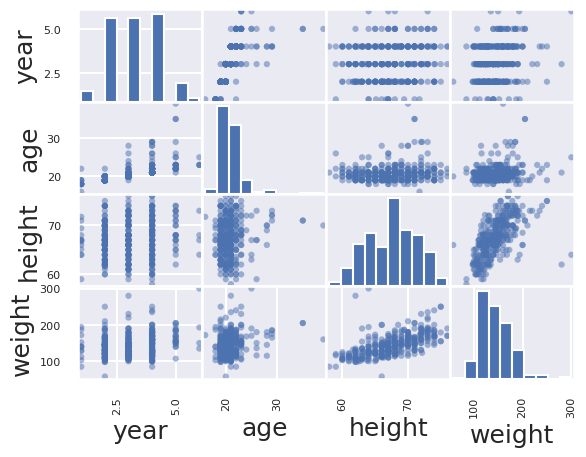

In [80]:
fig = pd.plotting.scatter_matrix(df)

In [81]:
assert np.all(fig)

In [82]:
'''
2b) Plot a bar chart showing the number of students in each major.
Hint:

if using seaborn, you’re looking to make a countplot

if using pandas, you can use value_counts to get the counts for each major. 
You can then use the plot method from pandas for plotting (You don’t need matplotlib).
'''

'\n2b) Plot a bar chart showing the number of students in each major.\nHint:\n\nif using seaborn, you’re looking to make a countplot\n\nif using pandas, you can use value_counts to get the counts for each major. \nYou can then use the plot method from pandas for plotting (You don’t need matplotlib).\n'

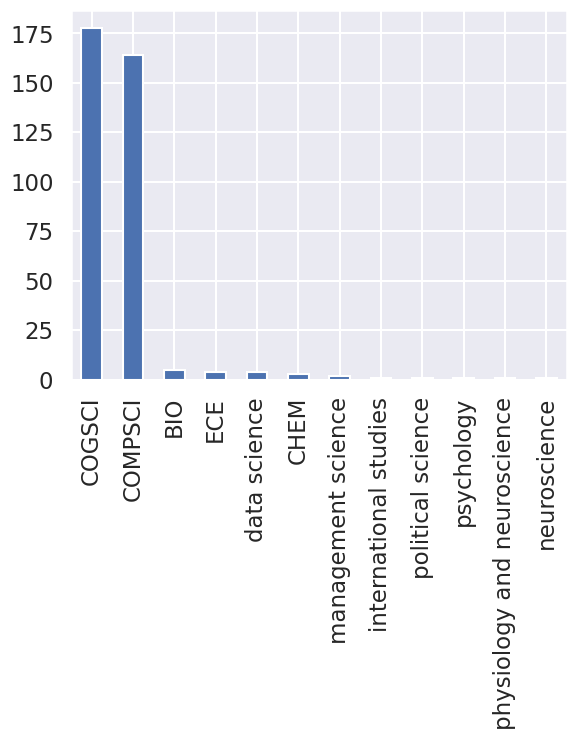

In [85]:
df['major'].value_counts().plot(kind='bar')

f1 = plt.gcf()

In [86]:
assert f1.gca().has_data()

In [87]:
'''
2c) Plot a histogram of the height data for all students who wrote ‘COGSCI’ as their major.
'''

'\n2c) Plot a histogram of the height data for all students who wrote ‘COGSCI’ as their major.\n'

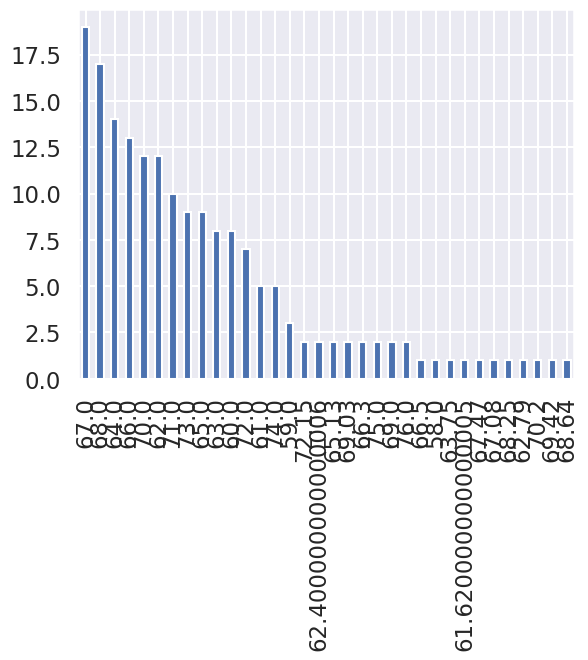

In [91]:
df[df['major'] == 'COGSCI']['height'].value_counts().plot(kind='bar')
f2 = plt.gcf()

In [92]:
assert f2.gca().has_data()

In [94]:
'''
2d) Plot a histogram of the height data for all students who wrote ‘COMPSCI’ as their major.
'''

'\n2d) Plot a histogram of the height data for all students who wrote ‘COMPSCI’ as their major.\n'

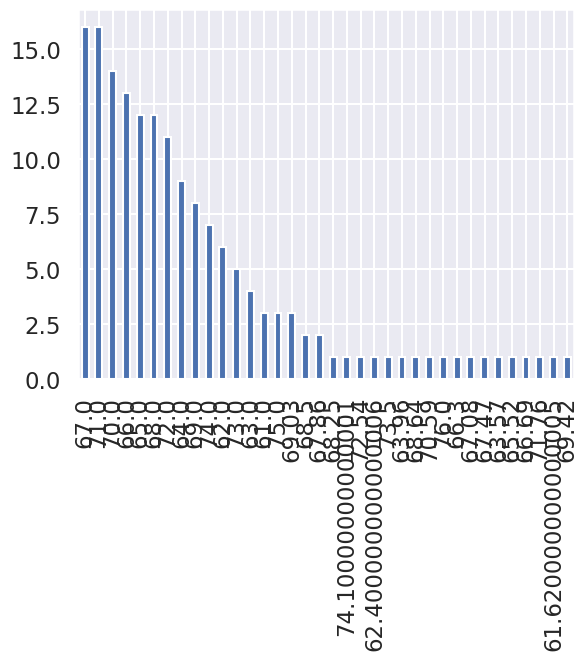

In [95]:
df[df['major'] == 'COMPSCI']['height'].value_counts().plot(kind='bar')
f3 = plt.gcf()

In [96]:
assert f3.gca().has_data()

In [97]:
'''
Part 3: Exploring The Data (0.8 points)
Beyond just plotting the data, we should check some other basic properties of the data. 
This serves both as a way to get a ‘feel’ for the data, and to look for any quirks or oddities about the data, 
that may indicate issues that need resolving. To do this, let’s explore that data a bit 
(not limiting ourselves to only features that we plan to use - exploring the dataset as a whole can help us find any issues).

Notes:

Your answers should NOT be pandas objects (Series or DataFrames), extract answers so the variables are ints, 
floats or strings (as appropriate).

You must answer these questions programmatically: do not count / check and hard code particular values.

3a) How many different majors are in the dataset?
Save this number to a variable n_majors.
'''

'\nPart 3: Exploring The Data (0.8 points)\nBeyond just plotting the data, we should check some other basic properties of the data. \nThis serves both as a way to get a ‘feel’ for the data, and to look for any quirks or oddities about the data, \nthat may indicate issues that need resolving. To do this, let’s explore that data a bit \n(not limiting ourselves to only features that we plan to use - exploring the dataset as a whole can help us find any issues).\n\nNotes:\n\nYour answers should NOT be pandas objects (Series or DataFrames), extract answers so the variables are ints, \nfloats or strings (as appropriate).\n\nYou must answer these questions programmatically: do not count / check and hard code particular values.\n\n3a) How many different majors are in the dataset?\nSave this number to a variable n_majors.\n'

In [103]:
n_majors = len(df['major'].unique())

In [104]:
assert n_majors >0 and n_majors < 25

In [105]:
'''
3b) What is the range (max value - min value) of ages in the dataset?
Save this number to a variable r_age.
'''

'\n3b) What is the range (max value - min value) of ages in the dataset?\nSave this number to a variable r_age.\n'

In [114]:
r_age = df['age'].max(), df['age'].min()

In [115]:
assert r_age > 0 and r_age < 50 

<class 'TypeError'>: '>' not supported between instances of 'tuple' and 'int'

In [116]:
'''
3c) What is the most popular ice cream flavor?
Save the ice cream name to the variable f_ice, and the number of people who like it to a variable n_ice.

Hint: you can get these values using the value_counts method.
'''

'\n3c) What is the most popular ice cream flavor?\nSave the ice cream name to the variable f_ice, and the number of people who like it to a variable n_ice.\n\nHint: you can get these values using the value_counts method.\n'

In [141]:
n_ice = df['favorite_icecream'].value_counts()[0]
f_ice = df['favorite_icecream'].value_counts().index[0]

In [142]:
assert n_ice > 0 and n_ice < 50

In [143]:
assert f_ice

In [144]:
'''
3d) How many people have a unique favorite ice cream? (In other words: how many ice cream flavors are only 1 person’s favorite?)
Save this number to a variable u_ice.
'''

'\n3d) How many people have a unique favorite ice cream? (In other words: how many ice cream flavors are only 1 person’s favorite?)\nSave this number to a variable u_ice.\n'

In [148]:
u_ice = 0
for flavor in df['favorite_icecream'].value_counts():
    if flavor == 1:
        u_ice +=1

In [149]:
assert u_ice > 0 and u_ice < 100

In [150]:
'''
Part 4: Testing Distributions (0.45 points)
Soon, in the data analysis, we will want to run some statistical tests on our data. First, we should check the distributions!

When using methods / statistical tests that make certain assumptions, 
it’s always best to explicitly check if your data meet those assumptions (otherwise the results may be invalid). 
Let’s test if our data are in fact normally distributed.

See an example of how to test the distributions of data in the ‘TestingDistributions’ notebook in Tutorials.

For convenience, and consistency, we’re providing this code to pull out the required data. 
Be sure to run the following cell and understand what it’s doing.:
'''

'\nPart 4: Testing Distributions (0.45 points)\nSoon, in the data analysis, we will want to run some statistical tests on our data. First, we should check the distributions!\n\nWhen using methods / statistical tests that make certain assumptions, \nit’s always best to explicitly check if your data meet those assumptions (otherwise the results may be invalid). \nLet’s test if our data are in fact normally distributed.\n\nSee an example of how to test the distributions of data in the ‘TestingDistributions’ notebook in Tutorials.\n\nFor convenience, and consistency, we’re providing this code to pull out the required data. \nBe sure to run the following cell and understand what it’s doing.:\n'

In [151]:
h_co = df[df['major'] == 'COGSCI']['height'].values
h_cs = df[df['major'] == 'COMPSCI']['height'].values

In [153]:
'''
4a) Testing Normality
For each of h_co, and h_cs, use the normaltest function to test for normality of the distribution.

normaltest returns two values: (1) a test statistic and (2) a p-value

Save these values as st_co, p_co, st_cs, and p_cs, respectively.
'''

'\n4a) Testing Normality\nFor each of h_co, and h_cs, use the normaltest function to test for normality of the distribution.\n\nnormaltest returns two values: (1) a test statistic and (2) a p-value\n\nSave these values as st_co, p_co, st_cs, and p_cs, respectively.\n'

In [157]:
st_co, p_co = normaltest(h_co)
st_cs, p_cs = normaltest(h_cs)

In [158]:
assert st_co
assert p_co
assert st_cs
assert p_cs

In [160]:
'''
Have a look at the values returned.

Based on these results, and using an alpha significance value of 0.01:

Set boolean values (True, False) of whether each distribution can be considered to be normally distributed. 
Set as True if the test supports it is normally distributed (or, more formally, we fail to reject the null hypothesis) 
and False if the test suggests the data is not normally distributed (we should reject the null hypothesis).

4b) Set boolean values, as specified above.
For the h_co data, set a boolean value to the var is_n_co

For the h_cs data, set a boolean value to the var is_n_cs
'''

'\nHave a look at the values returned.\n\nBased on these results, and using an alpha significance value of 0.01:\n\nSet boolean values (True, False) of whether each distribution can be considered to be normally distributed. \nSet as True if the test supports it is normally distributed (or, more formally, we fail to reject the null hypothesis) \nand False if the test suggests the data is not normally distributed (we should reject the null hypothesis).\n'

In [167]:
# null hypothesis: h_co and h_cs come from normal distributions
alpha = 0.01
if p_co < alpha:
    is_n_co = True
else:
    is_n_co = False
if p_cs < alpha:
    is_n_cs = True
else:
    is_n_cs = False

In [168]:
assert isinstance(is_n_co, bool)
assert isinstance(is_n_cs, bool)

In [169]:
'''
CO data: plot the comparison of the data and a normal distribution (this code provided)

This plots a histogram, with the hypothetical normal distribution (with same mean and variance)
'''

'\nCO data: plot the comparison of the data and a normal distribution (this code provided)\n\nThis plots a histogram, with the hypothetical normal distribution (with same mean and variance)\n'

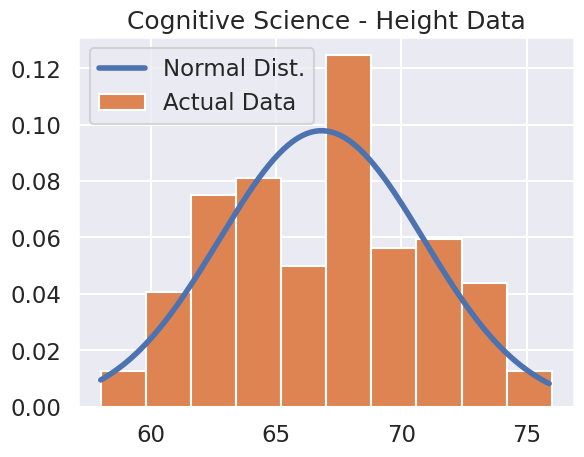

In [170]:
xs = np.arange(h_co.min(), h_co.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_co), np.std(h_co))
# most easily done using matplotlib
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_co, density = True, label = 'Actual Data');
plt.title('Cognitive Science - Height Data')
plt.legend();

In [171]:
'''
CS data: plot the comparison of the data and a normal distribution (this code provided)

This plots a histogram, with the hypothetical normal distribution (with same mean and variance)
'''

'\nCS data: plot the comparison of the data and a normal distribution (this code provided)\n\nThis plots a histogram, with the hypothetical normal distribution (with same mean and variance)\n'

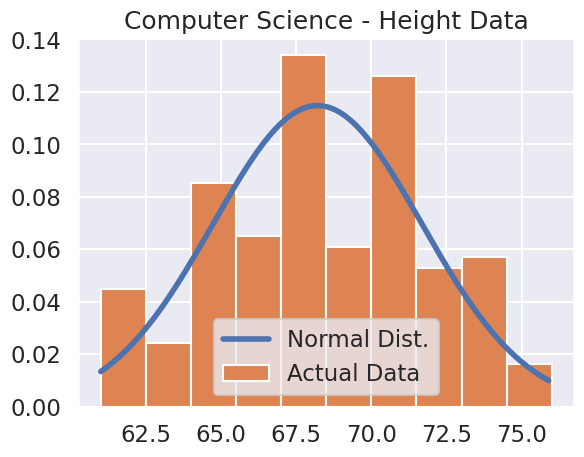

In [172]:
xs = np.arange(h_cs.min(), h_cs.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(h_cs), np.std(h_cs))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)
plt.hist(h_cs, density = True, label = 'Actual Data');
plt.title('Computer Science - Height Data')
plt.legend();

In [174]:
'''
Part 5: Data Analysis (2.4 points)
Now let’s analyze the data, to address our research question.

For the purposes of this analysis, let’s assume we need at least 75 students per major to analyze the height data.

This means we are only going to use data from people who wrote ‘COGSCI’ or ‘COMPSCI’ as their major.

5a) Pull out the data we are going to use:
Save the height data for all ‘COGSCI’ majors to a variable called h_co

Save the height data for all ‘COMPSCI’ majors to a variable called h_cs
'''

'\nPart 5: Data Analysis (2.4 points)\nNow let’s analyze the data, to address our research question.\n\nFor the purposes of this analysis, let’s assume we need at least 75 students per major to analyze the height data.\n\nThis means we are only going to use data from people who wrote ‘COGSCI’ or ‘COMPSCI’ as their major.\n\n5a) Pull out the data we are going to use:\nSave the height data for all ‘COGSCI’ majors to a variable called h_co\n\nSave the height data for all ‘COMPSCI’ majors to a variable called h_cs\n'

In [175]:
h_co = df[df['major'] == 'COGSCI']
h_cs = df[df['major'] == 'COMPSCI']

In [176]:
assert np.all(h_co)
assert np.all(h_cs)

assert len(h_co) == 178
assert len(h_cs) == 164

In [177]:
'''
5b) What is the average (mean) height for students from each major?
Save these values to avg_h_co for COGSCI students, and avg_h_cs for COMPSCI students.
'''

'\n5b) What is the average (mean) height for students from each major?\nSave these values to avg_h_co for COGSCI students, and avg_h_cs for COMPSCI students.\n'

In [185]:
avg_h_co = h_co['height'].mean()
avg_h_cs = h_cs['height'].mean()

In [186]:
assert avg_h_co
assert avg_h_cs

In [187]:
# Print out the average heights - this code provided
print('Average height of cogs majors is \t {:2.2f} inches'.format(avg_h_co))
print('Average height of cs majors is \t\t {:2.2f} inches'.format(avg_h_cs))

Average height of cogs majors is 	 66.81 inches
Average height of cs majors is 		 68.21 inches


In [188]:
'''
Based on the cell above, it looks like there might indeed be a difference in the average height for students in cogs vs cs majors.

Now we want to statistically test this difference. To do so, we will use a t-test.

5c) Compare distributions: t-test
Use the ttest_ind function) to compare the two height distributions (h_co vs h_cs)

ttest_ind returns a t-statistic, and a p-value. Save these outputs to t_val and p_val respectively.
'''

'\nBased on the cell above, it looks like there might indeed be a difference in the average height for students in cogs vs cs majors.\n\nNow we want to statistically test this difference. To do so, we will use a t-test.\n\n5c) Compare distributions: t-test\nUse the ttest_ind function) to compare the two height distributions (h_co vs h_cs)\n\nttest_ind returns a t-statistic, and a p-value. Save these outputs to t_val and p_val respectively.\n'

In [190]:
t_val, p_val = ttest_ind(h_co['height'], h_cs['height'])

In [191]:
assert t_val
assert p_val

In [192]:
# Check if statistical test passes significance, using an alpha value of 0.01. This code provided.
if p_val < 0.01:
    print('Data Science accomplished, there is a significant difference!')
else:
    print('There is NOT a significant difference!')
    
# Editorial note:
#  Chasing significant p-values as the goal itself is not actually a good way to do data (or any) science :)

Data Science accomplished, there is a significant difference!


In [194]:
'''
Note: this test should pass significance. If it doesn’t, double check your code up until this point.

So - we’ve reached a conclusion! We’re done right!?

Nope. We have a first pass analysis, and an interim conclusion that happens to follow our hypothesis.

Now let’s try to break it.

Let’s explore some more
You should always interrogate your findings, however they come out. What could be some alternate explanations, 
that would change our interpretations of the current analysis?

In this case, we should be worried about confounding variables. We want to be able to say whether height relates to major specifically, 
but it could be the case that some other variable, that happens to differ between majors, better explains the differences in height.

In this case, we also have data on gender. Let’s check if differences in the gender ratio of the two majors can explain 
the difference in height.

5d) Digging Deeper
Using value_counts from pandas, extract the number of ‘male’ and ‘female’, separately for cogs and cs students.

To do so:

select from the df each major, separately, extract the gender column, and use the value_counts method.

Save the counts for each gender for ‘COGSCI’ majors to a variable called g_co

Save the counts for each gender for ‘COMPSCI’ majors to a variable called g_cs
'''

'\nNote: this test should pass significance. If it doesn’t, double check your code up until this point.\n\nSo - we’ve reached a conclusion! We’re done right!?\n\nNope. We have a first pass analysis, and an interim conclusion that happens to follow our hypothesis.\n\nNow let’s try to break it.\n\nLet’s explore some more\nYou should always interrogate your findings, however they come out. What could be some alternate explanations, \nthat would change our interpretations of the current analysis?\n\nIn this case, we should be worried about confounding variables. We want to be able to say whether height relates to major specifically, \nbut it could be the case that some other variable, that happens to differ between majors, better explains the differences in height.\n\nIn this case, we also have data on gender. Let’s check if differences in the gender ratio of the two majors can explain \nthe difference in height.\n\n5d) Digging Deeper\nUsing value_counts from pandas, extract the number of 

In [197]:
g_co = df[df['major'] == 'COGSCI']['gender'].value_counts()
g_cs = df[df['major'] == 'COMPSCI']['gender'].value_counts()

In [200]:
assert np.all(g_co)
assert np.all(g_cs)

assert g_co[0] == 91
assert g_cs[1] == 38
assert g_cs[2] == 1

In [201]:
'''
5e) What is the ratio of women in each major?
By ratio, we mean the proportion of students that are female, as a ratio. This will be a value between 0.0 and 1.0, 
calculated as #F / (#F + #M + #nonbinary_or_other) - done separately for each major

You can use the g_co and g_cs variables to calculate these.

Save the ratio of women in COGSCI to a variable r_co.

Save the ratio of women in COMPSCI to a variable r_cs.

Note: keep these numbers as ratios (they should be decimal numbers, less than 1).
'''

'\n5e) What is the ratio of women in each major?\nBy ratio, we mean the proportion of students that are female, as a ratio. This will be a value between 0.0 and 1.0, \ncalculated as #F / (#F + #M + #nonbinary_or_other) - done separately for each major\n\nYou can use the g_co and g_cs variables to calculate these.\n\nSave the ratio of women in COGSCI to a variable r_co.\n\nSave the ratio of women in COMPSCI to a variable r_cs.\n\nNote: keep these numbers as ratios (they should be decimal numbers, less than 1).\n'

In [212]:
r_co = g_co['female'] / g_co.sum()
r_cs = g_cs['female'] / g_cs.sum()
print(r_co, r_cs)

0.48314606741573035 0.23170731707317074


In [210]:
assert r_co
assert r_cs

In [211]:
'''
Make sure you print out and check the values of these ratios. They seem pretty different.

We can actually ask, using a chi-squared test, whether this difference in gender-ratio between the majors is signficantly different.

Code to do this is provided below.

Run a chi-squared test of the difference of ratios of categorical data between groups:
'''

'\nMake sure you print out and check the values of these ratios. They seem pretty different.\n\nWe can actually ask, using a chi-squared test, whether this difference in gender-ratio between the majors is signficantly different.\n\nCode to do this is provided below.\n\nRun a chi-squared test of the difference of ratios of categorical data between groups:\n'

In [213]:
chisq, p_val_chi = stats.chisquare(np.array([g_co.values, g_cs.values]), axis=None)

if p_val_chi < 0.01:
    print('There is a significant difference in ratios!')

There is a significant difference in ratios!


In [214]:
'''
5f) Subsetting data
Create a new dataframe, called df2, which only includes data from ‘COGSCI’ and ‘COMPSCI’ majors.

Hint: you can do this using the or operater ‘|’, with loc.
'''

'\n5f) Subsetting data\nCreate a new dataframe, called df2, which only includes data from ‘COGSCI’ and ‘COMPSCI’ majors.\n\nHint: you can do this using the or operater ‘|’, with loc.\n'

In [216]:
df2 = df.loc[(df['major'] == 'COGSCI') | (df['major'] == 'COMPSCI')]

In [217]:
assert isinstance(df2, pd.DataFrame)
assert df2.shape == (342, 10)
assert set(df2['major']) == set(['COGSCI', 'COMPSCI'])

In [218]:
'''
5g) Pivot Tables
Another way to look at these kinds of comparisons is pivot tables.

Use the pandas pivot_table method to create a pivot table, assign it to a variable pv.

Set the values as ‘height’, and the indices as ‘gender’ and ‘major’ in the pivot table.

Make sure you do this using df2.
'''

'\n5g) Pivot Tables\nAnother way to look at these kinds of comparisons is pivot tables.\n\nUse the pandas pivot_table method to create a pivot table, assign it to a variable pv.\n\nSet the values as ‘height’, and the indices as ‘gender’ and ‘major’ in the pivot table.\n\nMake sure you do this using df2.\n'

In [219]:
pv = df2.pivot_table(values='height', index=['gender', 'major'])

In [220]:
pv.index.levels[0]

Index(['female', 'male', 'nonbinary_or_trans'], dtype='object', name='gender')

In [221]:
assert np.all(pv)
assert isinstance(pv.index, pd.MultiIndex)

In [223]:
'''
Print out the pivot table you just created.

Compare the average height values, split up by major and gender.

Does it look like there are differences in heights by major, when spit up by gender?
'''
pv

# No, it does not.

height
gender             major             
female             COGSCI   63.743023
                   COMPSCI  64.061842
male               COGSCI   69.734505
                   COMPSCI  69.502960
nonbinary_or_trans COGSCI   65.000000
                   COMPSCI  64.000000

In [224]:
'''
Let’s recap where we are:

Our initial hypothesis suggested there is a significant difference between heights of people in different majors.

However, further analyses suggested there may be a confounding variable, as there is also a significantly different 
gender balance between majors.

Checking the average height, per major, split up by gender, suggests there may not be a difference between major, 
other than what is explained by gender.

Now we want to statistically ask this question: is there still a difference in height between majors, 
when controlling for differences in gender?

Linear Models
For the following question you will need to make some linear models, using Ordinary Least Squares (OLS).

There is more than one way to do this in Python. For the purposes of this assignment, 
you must use the method that is outlined in the ‘LinearModels’ Tutorial, using patsy, and statsmodels.

That is:

Create design matrices with patsy.dmatrices

Initialize an OLS model with sm.OLS

Fit the OLS model

Check the summary for results.

5h) Linear model
Create a linear model to predict height from major (using df2 as data).

Use patsy.dmatrices to create the design matrices, calling the outputs outcome_1, predictors_1.

Create an OLS model (sm.OLS) using outcome_1 and predictors_1. Call it mod_1.

Fit the model, assigning it to res_1.
'''

'\nLet’s recap where we are:\n\nOur initial hypothesis suggested there is a significant difference between heights of people in different majors.\n\nHowever, further analyses suggested there may be a confounding variable, as there is also a significantly different \ngender balance between majors.\n\nChecking the average height, per major, split up by gender, suggests there may not be a difference between major, \nother than what is explained by gender.\n\nNow we want to statistically ask this question: is there still a difference in height between majors, \nwhen controlling for differences in gender?\n\nLinear Models\nFor the following question you will need to make some linear models, using Ordinary Least Squares (OLS).\n\nThere is more than one way to do this in Python. For the purposes of this assignment, \nyou must use the method that is outlined in the ‘LinearModels’ Tutorial, using patsy, and statsmodels.\n\nThat is:\n\nCreate design matrices with patsy.dmatrices\n\nInitialize an

In [228]:
outcome_1, predictors_1 = patsy.dmatrices("df2['height'] ~ df2['major']", df2)

In [232]:
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [233]:
assert isinstance(outcome_1, patsy.design_info.DesignMatrix)
assert isinstance(predictors_1, patsy.design_info.DesignMatrix)
assert isinstance(mod_1, sm.regression.linear_model.OLS)
assert isinstance(res_1, sm.regression.linear_model.RegressionResultsWrapper)